# Plot Concentration Bound
---

## Geometry of $\mathcal{X}\times \mathcal{Y}$: 
### Set the Rate at Which Embedding Distorts Geometry in As a Function of Euclidean Dimension

We consider four possible cases (``distortion_type``):
1. Worst-case (expander graph-type geometries)
2. Polynomial embedding (trees).
3. Subsets of Euclidean space.
4. Subspaces (metric) of the real line.

In [255]:
distortion_type = 3

### Decide on N vs k

### N

In [256]:
N = 1*(10**3)
N_is_Small = True

### k

#### Either we set k manually or we consider the no. Points Needed to Pack a Cube:

From [George G. Lorentz, Manfred v. Golitschek, and Yuly Makovoz. Constructive approximation - Proposition 1.3](https://link.springer.com/book/9783642646102) the packing number of $[0,\operatorname{diam}]^d$ in $\ell_{\infty}^d$ by $\ell_{\infty}^d$-balls of radius $10^{-p}$ is no more than
$$
k \ge 
\Big\lceil
2^{-d}
        \,
        \Big(10^{p}*\operatorname{diam}\Big)^d
\Big\rceil
$$
we use this lower-bound to compute $k$.

In [306]:
# Cube or no Cube?
cube_k = True

# If Cube
diam = 1*(10**0)
d = 1*(10**2); print('Prototypical Space: [0,'+str(diam)+']^'+str(d))
p = 1*(10**0); print('Distance Between Points on the Grid: '+str(10**-p))

# If Manual 
k_manual = 1*(10**8)

Prototypical Space: [0,1]^100
Distance Between Points on the Grid: 0.1


## Import Packages and Set Global Hyperparameters

In [307]:
%run ./SupportFiles/Dependancies.ipynb
print('---')

Dependancies and Packages Loaded
---


# Set Global Parameters

## Are we Computing Risk Bounds or Concentration Bounds (in $\mathcal{W}_1$)?
- For Risk Bounds set: True
- For Concentration Bounds set: False

In [308]:
Risk_or_Concentration = True
Isometric_Embedding = True

#### Decide on How Many Points to Use?

In [309]:
if cube_k:
    k = round( ( 2**(-d) ) * ((diam*(10**(p))**d)) ); print('Number of points:'+str(k))
else:
    k = k_manual

Number of points:7888609052210118179568976417591761882603167107907294485042182806831104


Load Global hyperparameters, now that internal parameters have been defined.

In [310]:
%run ./SupportFiles/Global_Hyperparameters.ipynb
print('---')

Results are to Hold with Probability at-least: 95.0%
We consider: 1-Lipschitz Hypotheses
Max Representation Space Dimension (F aka m): 4.605170185988092
---


---

Load helper functions.

In [311]:
print('---')
%run ./SupportFiles/Helper_Functions.ipynb
print('---')

---
Helper Functions Loaded
---


# The Risk Bound Computers

We compare our risk bound against the following binary classification benchmarks.

## Benchmark: Trivial VC/Occam Bound (Binary Classification)
From the The (Quantitative) Fundamental Theorem of Statistical Learning ([Theorem 6.8 in "Understanding Machine Learning" (with extra details in Section 28.1)](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=kezPqwoAAAAJ&citation_for_view=kezPqwoAAAAJ:XiVPGOgt02cC)
$$
\begin{aligned}
    \mathcal{R}(f) - \hat{\mathcal{R}}(f)
\le &
    n^{-1/2}
    (
        128 \operatorname{VC-dim}\log(n+1) + \log(8/\delta)
    )^{1/2}
\\ 
\le & 
    n^{-1/2}
    (
        128 \#\mathcal{X}\log(n+1) + \log(8/\delta)
    )^{1/2}
\end{aligned}
$$
where we use the fact that $\operatorname{VC-dim}(2^{\mathcal{X}})\le \log_2(\#2^{\mathcal{X}})=\#\mathcal{X}$.

## Hoeffding Bound


From [Corollary 4.6 of "Understanding Machine Learning"](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=kezPqwoAAAAJ&citation_for_view=kezPqwoAAAAJ:XiVPGOgt02cC) we have the following Heofding-type bound
$$
\begin{aligned}
    (2n)^{-1/2}
    \log\big(
    2 \times 2^k/\delta
    \big)^{1/2}
    = 
    (2n)^{-1/2}
     \big(
     \log(2/\delta) + k\log(2)
     \big)^{1/2}
\end{aligned}
$$

Load risk bound functions.

In [312]:
%run ./SupportFiles/Risk_Bound_Engine.ipynb

Risk Bounds Loaded


## Generate Plot

#### Decide on Scale of Sample Size (Range: Small N or Large N)

In [350]:
# Indices
indexing_set = range(20,100,10)

In [351]:
Print_Occam = True

---

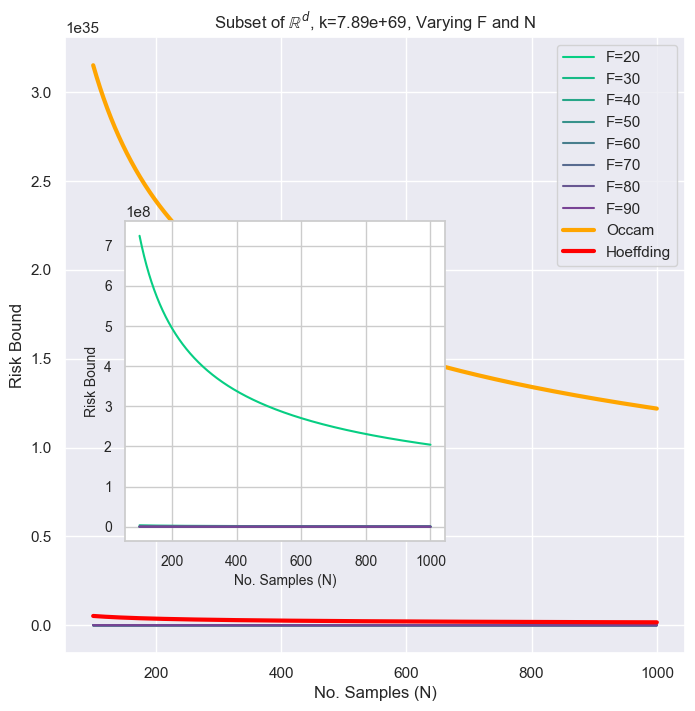

In [356]:
ax = plt.figure(figsize=(8,8))
sns.set_style("darkgrid")

plt.title(''+dist_name+', k='+str('{:.2e}'.format(k))+', Varying F and N')
    

plt.xlabel('No. Samples (N)')
plt.ylabel('Risk Bound')# on $\sup_{f\in \mathcal{F}}\,|\mathcal{R}(\hat{f})-\hat{\mathcal{R}}(\hat{f})|$')
# plt.ylabel('Bound on $\mathbb{E}[\mathcal{W}_1(\mathbb{P},\mathbb{P}^N)]$')



# Set Max No Colours
n_col=max(indexing_set)+2


#### Plot Generation
for i in indexing_set:
    # Set Value of F
    F_global = int(np.round(i,0))
    
    # Write Function of N only
    def get_risk_bound__NVar_scalar(N):
        return get_risk_bound__scalar(k=k_global,F=F_global,N=N)
    
    get_risk_bound__NVar = np.vectorize(get_risk_bound__NVar_scalar)
    
    # Compute Risk Bound
    Risk_Bounds = get_risk_bound__NVar_scalar(N_sequence)

    
    # Plot
    col_index = (i-min(indexing_set))/(max(indexing_set)+1)
    plt.plot(N_sequence, Risk_Bounds,label = 'F='+str(F_global).format(i=i),color=colorFader(c1,c2,col_index))

### Classical Risk-Bounds for Binary Classification
if Y_is_bin_class == True:
    if Print_Occam:
        ###----------------###
        ### VC/Occam Bound ###
        ###----------------###
        # Write Function of N only
        def get_risk_bound__VC_scalar(N):
            return trivial_VCBound(N_in=N,k_in=k,delta = delta)
        get_risk_bound__VC = np.vectorize(get_risk_bound__VC_scalar)

        # Compute Risk Bound
        Risk_Bounds__VC = get_risk_bound__VC(N_sequence)

        # Plot Risk-Bound
        plt.plot(N_sequence,Risk_Bounds__VC,label = 'Occam',c='orange',linewidth=3)
    ###-----------------###
    ### Hoeffding Bound ###
    ###-----------------###
    # Write Function of N only
    def get_risk_bound__Hoeffding_scalar(N):
        return Hoeffding_Bound(N_in=N,k_in=k,delta = delta)
    get_risk_bound__Hoeffding = np.vectorize(get_risk_bound__Hoeffding_scalar)
    
    # Compute Risk Bound
    Risk_Bounds__Hoeffding = get_risk_bound__Hoeffding(N_sequence)
    
    # Plot Risk-Bound
    plt.plot(N_sequence,Risk_Bounds__Hoeffding,label = 'Hoeffding',c='red',linewidth=3)

plt.legend(loc='best')

# ----------------------------------------------------- #
sns.set_style("whitegrid")
axes1 = ax.add_axes([0.2, 0.25, 0.4, 0.4]) # inset axes (location first, size second)
# axes1.set_title('Bound',fontsize=15)

#### Plot Generation
for i in indexing_set:
    # Set Value of F
    F_global = int(np.round(i,0))
    
    # Write Function of N only
    def get_risk_bound__NVar_scalar(N):
        return get_risk_bound__scalar(k=k_global,F=F_global,N=N)
    
    get_risk_bound__NVar = np.vectorize(get_risk_bound__NVar_scalar)
    
    # Compute Risk Bound
    Risk_Bounds = get_risk_bound__NVar_scalar(N_sequence)

    
    # Plot
    col_index = (i-min(indexing_set))/(max(indexing_set)+1)
    plt.plot(N_sequence, Risk_Bounds,label = 'F='+str(F_global).format(i=i),color=colorFader(c1,c2,col_index))

plt.xlabel('No. Samples (N)',fontsize=10)
plt.ylabel('Risk Bound',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ----------------------------------------------------- #

plt.savefig('Experiments/Risk_Bound_F/WBenchmarks__NF_kis'+str(k_global)+'.pdf')
plt.show()

---
# Fin #
---